In [109]:
from backtest import *

import numpy as np

import pandas as pd

ko_dates = np.array([60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 
                     280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480])

ko_barriers = np.array([1.02, 1.017, 1.014, 1.011, 1.008, 1.005, 1.002, 0.999, 0.996, 0.993, 0.990,
                        0.987, 0.984, 0.981, 0.978, 0.975, 0.972, 0.969, 0.966, 0.963, 0.960, 0.957])

ki_barrier = 0.70

my_snowball = Snowball(ko_dates, ko_barriers,ki_barrier)


In [110]:
df = pd.read_excel("zz1000.xlsx")

In [111]:
prices= np.array(df['close_price'].values)[240:]

In [119]:
def signal(x_price):
 
    return 0.95*5367 < x_price < 1.05*5367



number_snowball = 0
number_ki = 0
nki_duration = []
ki_loss = []


for i in range(len(prices[:-500])):
    
    if signal(prices[i]):
        number_snowball += 1
        ki, duration, pnl =issue_snowball(my_snowball, prices[i:])
        
        if ki:
            number_ki+=1
            ki_loss.append(pnl)
        else:
            nki_duration.append(duration)
        

In [120]:
number_snowball

372

In [121]:
number_ki

94

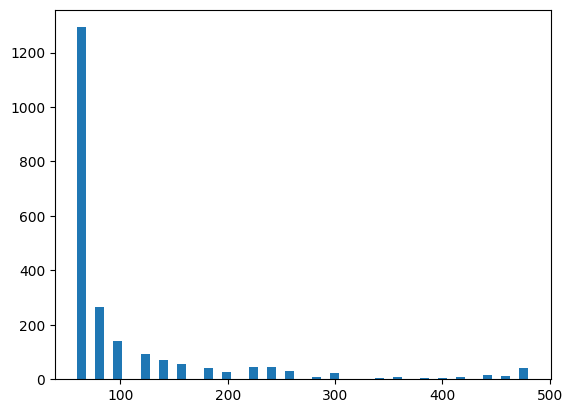

In [115]:
import matplotlib.pyplot as plt

plt.hist(nki_duration, 50)
plt.show()

In [116]:
np.mean(nki_duration)

106.36039250669046

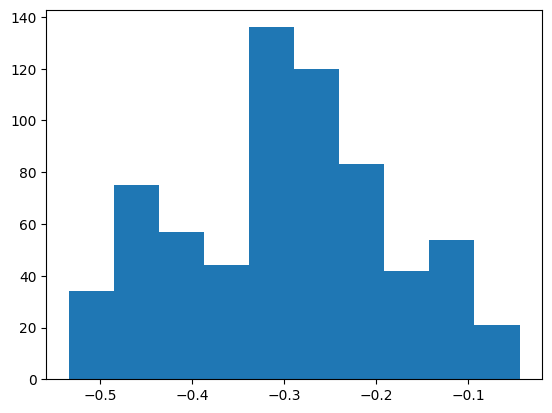

In [117]:
plt.hist(ki_loss, bins=10)
plt.show()

In [118]:
np.mean(ki_loss)

-0.2979180711952247